In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout 
from scipy.optimize import minimize 


/Users/arush/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2024-05-10 07:16:58.611168: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[*********************100%%**********************]  145 of 145 completed
/Users/arush/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - loss: 52.5740 - val_loss: 51.1608
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 40.3537 - val_loss: 41.2550
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 37.7571 - val_loss: 45.1846
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 33.9793 - val_loss: 33.5730
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 27.9865 - val_loss: 31.3049
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 30.5667 - val_loss: 30.1927
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 22.1024 - val_loss: 25.6787
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 20.5004 - val_loss: 25.8303
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.0201 - val_loss: 19.5746
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 18.3624 - val_loss: 20.6803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/

[*********************100%%**********************]  145 of 145 completed


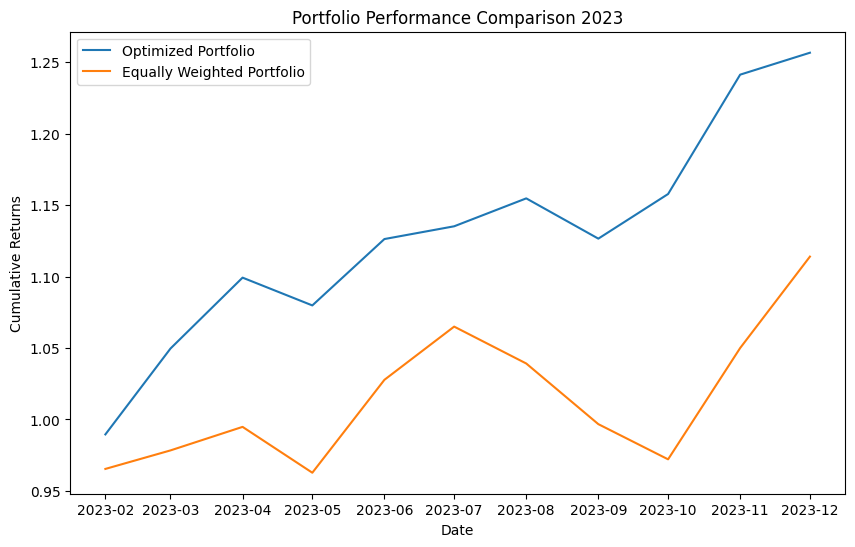

Final value of Optimized Portfolio: 1256.7635342636886
Final value of Equally Weighted Portfolio: 1114.0193408539528
Performance Difference (Optimized - Equal): 142.74419340973577


In [17]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout 
from scipy.optimize import minimize 

# Step 1: Define tickers and exclude specific ones
tickers = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "META", "JNJ", "V", "PG",
    "JPM", "UNH", "MA", "INTC", "VZ", "T", "HD", "DIS", "MRK", "PFE",
    "BAC", "KO", "CSCO", "PEP", "CMCSA", "XOM", "ORCL", "C", "WFC", "MCD",
    "ABT", "ABBV", "CVX", "MDT", "BMY", "QCOM", "NKE", "COST", "LLY", "NEE",
    "AMGN", "ACN", "DHR", "GILD", "UPS", "LOW", "BA", "AVGO", "IBM", "MMM",
    "SBUX", "UNP", "TMO", "HON", "TXN", "MS", "AMAT", "GS", "CAT", "GE",
    "DE", "CVS", "RTX", "SCHW", "MDLZ", "BKNG", "CI", "GM", "PYPL", "TGT",
    "AXP", "NOW", "ADBE", "SPGI", "F", "MO", "LMT", "SYK", "TJX", "BLK",
    "MET", "ISRG", "PNC", "DUK", "SO", "PLD", "USB", "COP", "MMC",
    "FDX", "ADP", "NSC", "ITW", "MU", "BIIB", "CME", "INTU",
    "CL", "BDX", "CSX", "ZTS", "REGN", "GM", "SRE", "EOG", "BSX", "ILMN",
    "AIG", "ADI", "VRTX", "NOC", "EW", "DG", "WM", "ETN", "SLB", "EMR",
    "AON", "LRCX", "ROST", "PGR", "APD", "TEL", "PPG", "IQV", "COF", "ECL",
    "FIS", "AFL", "NUE", "ADM", "PRU", "ALL", "MAR", "AEP", "STZ", "WBA",
    "PCAR", "MCK", "PH", "GIS", "ROK", "SHW", "SYY", "CB", "BAX", "YUM"
]  # Truncated for brevity, include your full list

# Define the SPO+ Loss Function
def spo_plus_loss(y_true, y_pred):
    num_features = y_pred.shape[-1]
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    C = tf.random.normal((num_features, num_features))
    decision_error = tf.einsum('bi,ij->bj', y_true - 2 * y_pred, C)
    loss = tf.reduce_mean(tf.square(decision_error))
    return loss

# Fetch data
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date, interval='1mo')
    return data['Adj Close']

start_date = '2010-01-01'
end_date = '2022-12-31'
data = fetch_data(tickers, start_date, end_date)
monthly_returns = data.pct_change().dropna()

# Normalize data
scaler = MinMaxScaler()
scaled_returns = scaler.fit_transform(monthly_returns)

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 12
X, y = create_sequences(scaled_returns, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train LSTM model
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(input_shape[1])  # Predict returns for each stock
    ])
    model.compile(optimizer='adam', loss=spo_plus_loss)
    return model

model = build_model((sequence_length, X.shape[2]))
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict and optimize
X_2023 = scaled_returns[-sequence_length:].reshape(1, sequence_length, scaled_returns.shape[1])

# Number of iterations to run the optimization
num_iterations = 100
all_weights = np.zeros((num_iterations, n_stocks))


for i in range(num_iterations):
    predicted_2023 = model.predict(X_2023)
    predicted_2023_returns = scaler.inverse_transform(predicted_2023)

    # Optimize weights based on predictions
    result = minimize(spo_loss, initial_weights, args=(predicted_2023_returns.flatten(),),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    
    if result.success:
        all_weights[i, :] = result.x
    else:
        all_weights[i, :] = np.array([1.0 / n_stocks] * n_stocks)  # Use equal weights if optimization fails

# Calculate average optimized weights
average_optimized_weights = np.mean(all_weights, axis=0)

# Fetch returns data for 2023
data_2023 = yf.download(tickers, start='2023-01-01', end='2023-12-31', interval='1mo')['Adj Close']
returns_2023 = data_2023.pct_change().dropna()

# Now using the actual optimized weights
optimized_final_value, optimized_cumulative_returns = portfolio_performance(
    returns_2023, average_optimized_weights, invested_amount)

# Continue with the equal weights calculation
equal_final_value, equal_cumulative_returns = portfolio_performance(
    returns_2023, equal_weights, invested_amount)

# Plotting the cumulative returns for visualization
plt.figure(figsize=(10, 6))
plt.plot(optimized_cumulative_returns.index, optimized_cumulative_returns, label='Optimized Portfolio')
plt.plot(equal_cumulative_returns.index, equal_cumulative_returns, label='Equally Weighted Portfolio')
plt.title('Portfolio Performance Comparison 2023')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Display final values
print("Final value of Optimized Portfolio:", optimized_final_value)
print("Final value of Equally Weighted Portfolio:", equal_final_value)

# Performance difference
performance_difference = optimized_final_value - equal_final_value
print("Performance Difference (Optimized - Equal):", performance_difference)

In [18]:
# Associate tickers with optimized weights
tickers_weights = dict(zip(tickers, average_optimized_weights))

# Sort tickers based on optimized weights
sorted_tickers_weights = sorted(tickers_weights.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 tickers with highest weights
top_5_tickers_weights = sorted_tickers_weights[:5]

# Print the top 5 tickers with their weights
print("Top 5 Tickers with Highest Weights:")
for ticker, weight in top_5_tickers_weights:
    print(f"{ticker}: {weight}")


Top 5 Tickers with Highest Weights:
GM: 0.19935778923128603
BSX: 0.15436860458327786
ITW: 0.15182470878160673
MO: 0.10603324847360847
PYPL: 0.08372332753356539
